### **Introduction**
  This dataset contains 3 month's sales details of supermarket company. Data has customer information, location information, Store information and sales information.
Sales information contain data such as cogs, gross margin percentage and gross income.

The objectives of this analysis is to explore the relationship between Sales and other properties. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sales_df = pd.read_csv('supermarket_sales - Sheet1.csv')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# unique values of each coloumns.
sales_df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

**Dataset Overview :**

- This data has 17 coloumns and 1,000 rows.
- There are no null values in the dataset.
- Data contains both numeric and categorical values. 


**Variables Overview :**
- Data has customer information, location information, Store information and sales information.
- Sales information contain data such as cogs, gross margin percentage and gross income.



---



### **Data Preparation**

In [ ]:
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64



> There are no null values.



Converting date and time into datetime type.

In [3]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Time'] = pd.to_datetime(sales_df['Time'])

Creating hour and minute coloumns.

In [4]:
sales_df['Hour'] = sales_df['Time'].dt.hour
sales_df['Minute'] = sales_df['Time'].dt.minute
sales_df.drop(["Time"],axis = 1, inplace=True)

In [5]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,37


Using box plot to see value distribution and statistics

Unit price         AxesSubplot(0.125,0.536818;0.227941x0.343182)
Quantity        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Total           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
cogs                  AxesSubplot(0.125,0.125;0.227941x0.343182)
gross income       AxesSubplot(0.398529,0.125;0.227941x0.343182)
Rating             AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

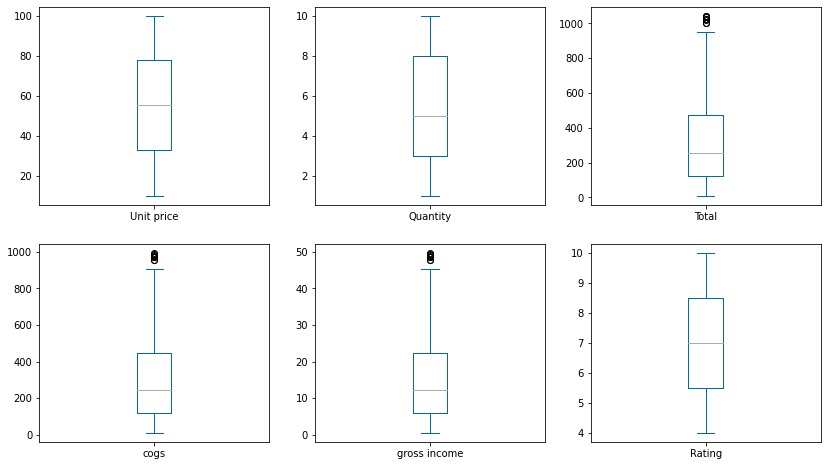

In [6]:
boxplot_cols = ['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']
plt.style.use('tableau-colorblind10')
sales_df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))



> So for the cogs, gross income and total variable values that are in upper and lower quartile is ok because price can be of any range.
> And they are also related. 





statistical measures :

In [7]:
sales_df[['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']].describe()

,Unit price,Quantity,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000




---



### **Analyzing and Visualizing data**

First we will use corr() function to see correlation between them. It uses pearson correlation coefficients method and only include numerical coloumns.

In [8]:
corr_matrix = sales_df.corr()
mask = np.triu(corr_matrix)
corr_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Minute
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.008242,-0.006869
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.007317,-0.014929
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.027480
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.027480
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.027480
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.027480
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.030588,0.050558
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,1.000000,-0.025384
Minute,-0.006869,-0.014929,-0.027480,-0.027480,-0.027480,NaN,-0.027480,0.050558,-0.025384,1.000000




> As we can see there are very high correlation between some variables. And we can intuitively also verify it.  





---



Now i will visualize it in different plots to get informations. 

Product sales by Gender :

In [9]:
df_ca = pd.melt(sales_df, id_vars=["Gender"], value_vars = ['Product line'])
df_ca["total"] = 0
df_ca = df_ca.groupby(["Gender", "variable", "value"]).count().reset_index()

Text(0.5, 0.98, 'Product sales by Gender')

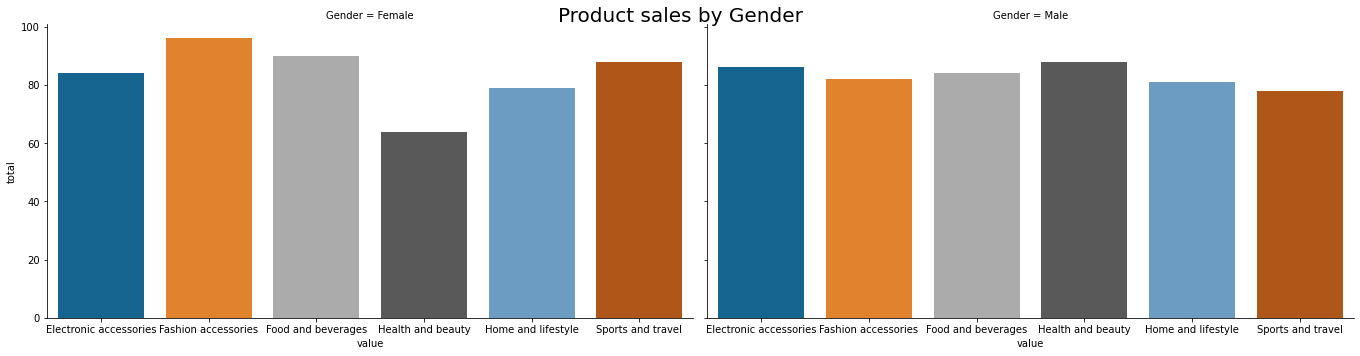

In [18]:
sns.catplot(kind="bar",  x="value", y="total", col="Gender", data=df_ca, height=5, aspect=1.9)
plt.suptitle("Product sales by Gender", size=20)



> So in the data Female did buy more Fashion accessories and Male did buy more Electronic accessories. 





---



Sales and profit by City :

In [ ]:
city_df = sales_df.groupby(["City"])["Total", "gross income"].sum().reset_index()
city_df.rename(columns = {'Total':'Total Sales'}, inplace = True)

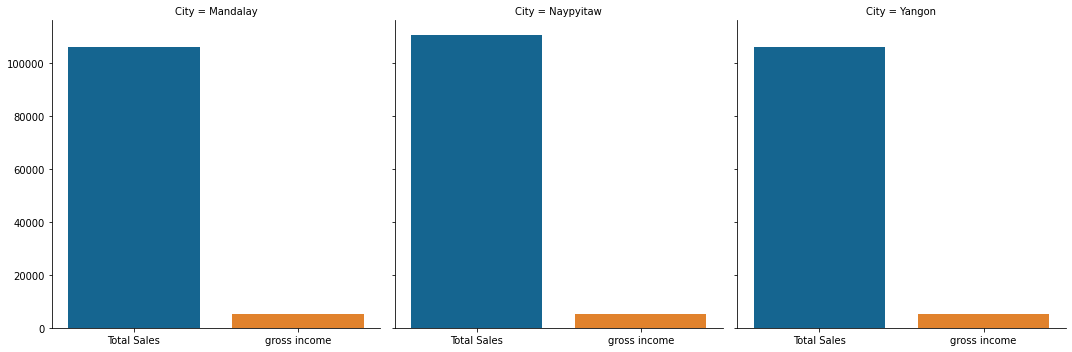

In [25]:
sns.catplot(kind="bar", col="City", data=city_df, height=5, aspect=1)

In [26]:
city_df

,City,Total Sales,gross income
0,Mandalay,106197.6720,5057.0320
1,Naypyitaw,110568.7065,5265.1765
2,Yangon,106200.3705,5057.1605



Naypyitaw City has highest sales, Followed by Yangon and Mandalay.
* Naypyitaw : 110568.7065(USD)
* Yangon : 106200.3705(USD)
* Mandalay : 106197.6720(USD)

Highest Profit was done by Cities
* Naypyitaw : 5265.1765(USD) 
* Yangon : 5057.1605(USD)
* Mandalay : 5057.0320(USD) 





---



In [ ]:
print('Total  Naypyitaw city Sales : {}$ '.format(c["Total Sales"].max()))

Total  Naypyitaw city Sales : 110568.7065$ 




---



Sales and profit by Customer type :

In [ ]:
cust_df = sales_df.groupby(["Customer type"])["Total", "gross income"].sum().reset_index()
cust_df.rename(columns = {'Total':'Total Sales'}, inplace = True)

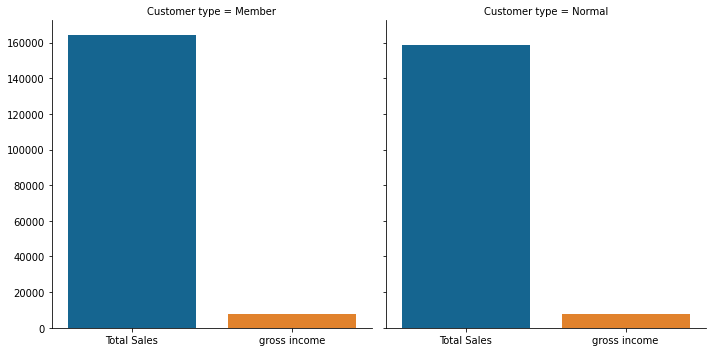

In [33]:
sns.catplot(kind="bar", col="Customer type", data=cust_df, height=5, aspect=1)



Total sales from the both the typeof customer are almost equal. So membership doesn't affect much sales.

Total Sales done by Customer type.
* Member : 164223.444(USD)
* Normal : 158743.305(USD)

Total Profit done by Customer type.
* Member : 7820.164(USD) 
* Normal : 7559.205(USD) 


---





Sales and profit by Branch :

In [ ]:
branch_df = sales_df.groupby(["Branch"])["Total", "gross income"].sum().reset_index()
branch_df.rename(columns = {'Total':'Total Sales'}, inplace = True)

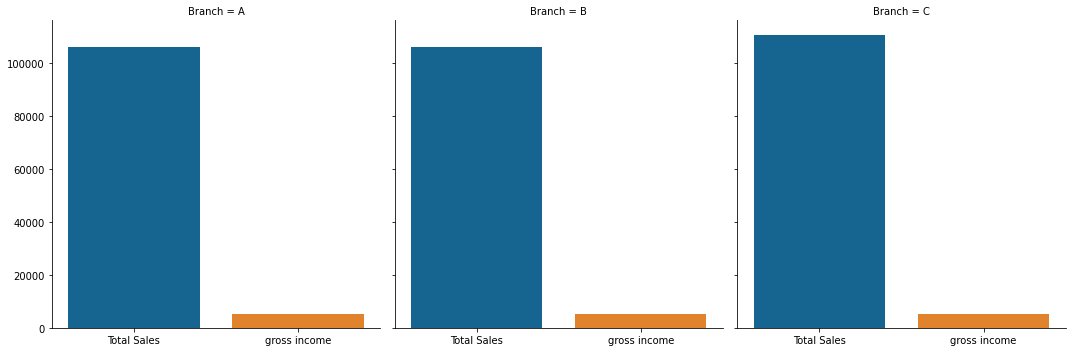

In [35]:
sns.catplot(kind="bar", col="Branch", data=branch_df, height=5, aspect=1)

 Branch C did more sales than other branch followed by branch B and A.
* Branch C : 11056A.70651(USD)
* Branch B : 106197.6720(USD)
* Branch A : 106200.3705(USD)

Highest Profit was done by Cities
* Branch C : 5265.1765B(USD) 
* Branch A : 5057.1605(USD)
* Branch B : 5057.0320(USD) 


---



Sales and profit by Month :

In [ ]:
m_df =sales_df.copy()
m_df["Month"]= sales_df['Date'].dt.month
mon_df = m_df.groupby(["Month"])["Total", "gross income"].sum().reset_index()
mon_df.rename(columns = {'Total':'Total Sales'}, inplace = True)

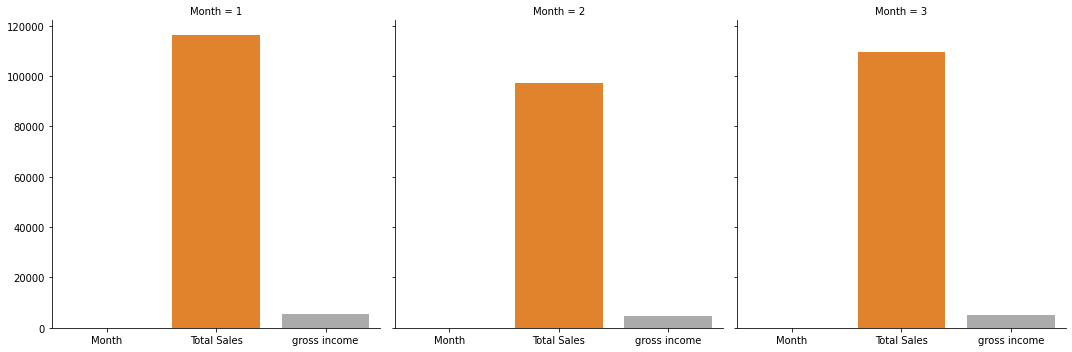

In [40]:
sns.catplot(kind="bar", col="Month", data=mon_df, height=5, aspect=1)

In [41]:
mon_df

,Month,Total Sales,gross income
0,1,116291.868,5537.708
1,2,97219.374,4629.494
2,3,109455.507,5212.167




> In January highest sales happen and less in february.


---





Sales by Product line :

In [ ]:
product_df = sales_df.groupby(["Product line"])["Total", "gross income"].sum().reset_index()
product_df.rename(columns = {'Total':'Total Sales'}, inplace = True)

Text(0.5, 1.0, 'Product sales by Productline')

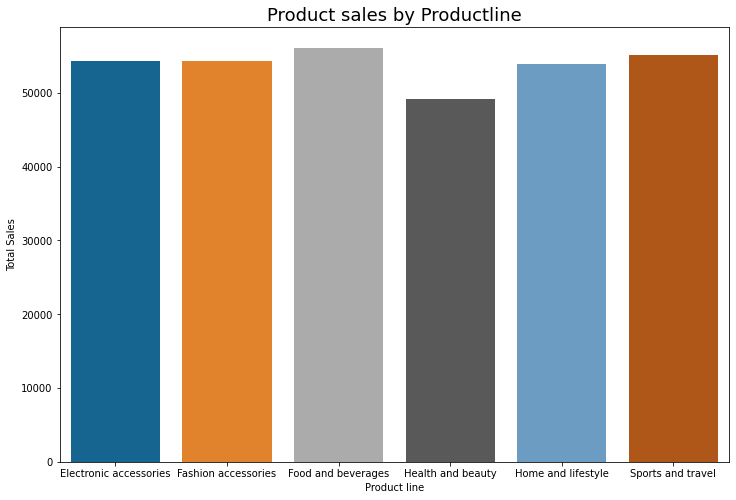

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=product_df, x="Product line", y="Total Sales",)
plt.title("Product sales by Productline", size=18)

In [46]:
product_df

,Product line,Total Sales,gross income
0,Electronic accessories,54337.5315,2587.5015
1,Fashion accessories,54305.8950,2585.9950
2,Food and beverages,56144.8440,2673.5640
3,Health and beauty,49193.7390,2342.5590
4,Home and lifestyle,53861.9130,2564.8530
5,Sports and travel,55122.8265,2624.8965




---



**CONCLUSION :**

- Total sales of 3 months is 322966.749 doller.
- Branch C did highest sales of 110568.7065($).
- Members and non members sales are same.
- Naypyitaw city has more sales than other cities.
- January has more and february has less sales maybe because number of days are less in february.
- There is correlation between product type and Gender. Female did buy more Fashion accessories and Male did buy more Electronic accessories.
- People are buying more Food and Beverages than other items.
- More paremeters are needed for more insights.  
  